In [262]:
# import libraries
import numpy as np
import pandas as pd

from matplotlib import pyplot as plt
import seaborn as sb
from scipy.optimize import minimize
import scipy.stats as stats
import pymc3 as pm3
#import numdifftools as ndt
import statsmodels.api as sm
from statsmodels.base.model import GenericLikelihoodModel
%matplotlib inline

In [27]:
# generate data
N = 100
x = np.linspace(0,20,N)
ϵ = np.random.normal(loc = 0.0, scale = 5.0, size = N)
y = 3*x + ϵ

df = pd.DataFrame({'y':y, 'x':x})
df['constant'] = 1

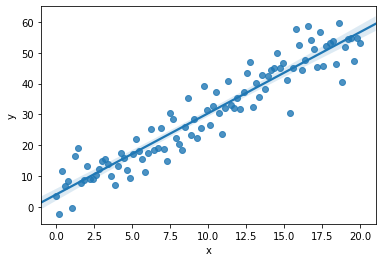

In [28]:
# plot
sns.regplot(df.x, df.y);

In [29]:
# split features and target
X = df[['constant', 'x']]# fit model and summarize
sm.OLS(y,X).fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.899
Model:                            OLS   Adj. R-squared:                  0.898
Method:                 Least Squares   F-statistic:                     874.6
Date:                Wed, 23 Oct 2019   Prob (F-statistic):           1.23e-50
Time:                        20:09:17   Log-Likelihood:                -305.76
No. Observations:                 100   AIC:                             615.5
Df Residuals:                      98   BIC:                             620.7
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
constant       3.9975      1.032      3.872      0.000       1.949       6.046
x              2.6373      0.089     29.573      0.000       2.460       2.814
==============================================================================
Omnibus:                        0.226   Durbin-Watson:                   1.897
Prob(Omnibus):                  0.893   Jarque-Bera (JB):                0.024
Skew:                           0.015   Prob(JB):                        0.988
Kurtosis:                       3.070   Cond. No.                         23.1
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [8]:
# define likelihood function
def MLERegression(params):
    intercept, beta, sd = params[0], params[1], params[2] # inputs are guesses at our parameters
    yhat = intercept + beta*x # predictions# next, we flip the Bayesian question
    # compute PDF of observed values normally distributed around mean (yhat)
    # with a standard deviation of sd
    negLL = -np.sum( stats.norm.logpdf(y, loc=yhat, scale=sd) )# return negative LL
    return(negLL)

In [12]:
# let’s start with some random coefficient guesses and optimize
guess = np.array([5,5,2])

results = minimize(MLERegression, guess, method = 'Nelder-Mead', options={'disp': True})

Optimization terminated successfully.
         Current function value: 302.919091
         Iterations: 129
         Function evaluations: 224


In [14]:
results.x

array([0.11320141, 2.92421209, 5.00406784])

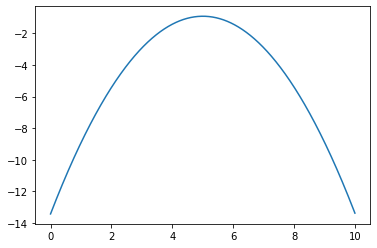

In [24]:
x = np.arange(0, 10, 0.01)
y = stats.norm.logpdf(x, loc=5, scale=1)
plt.plot(x, y)
#plt.plot(x, stats.norm.pdf(x, loc=5, scale=1))

In [129]:
# generate data
N = 100
x = np.linspace(0,20,N)
ϵ = np.random.normal(loc = 5.0, scale = 5.0, size = N)
y = ϵ

df = pd.DataFrame({'y':y, 'x':x})
df['constant'] = 1

# split features and target
X = df[['constant', 'x']]# fit model and summarize
#sm.OLS(y,X).fit().summary()

In [130]:
y_binned, x = np.histogram(y, bins=10, density=True)
x = (x[1]-x[0])/2 + x[:-1]

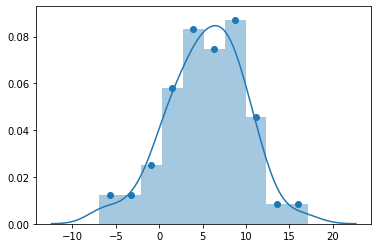

In [131]:
sns.distplot(y)
plt.scatter(x, y_binned)

In [132]:
popt, pcov = curve_fit(stats.norm.pdf, x, y_binned, p0=[1, 2])
popt

array([5.88786122, 4.50385811])

In [138]:
# define likelihood function
def MLERegression(params):
    intercept, sd = params[0], params[1] # inputs are guesses at our parameters
    yhat = intercept # predictions# next, we flip the Bayesian question
    # compute PDF of observed values normally distributed around mean (yhat)
    # with a standard deviation of sd
    negLL = -np.sum( stats.norm.logpdf(y, loc=yhat, scale=sd) )# return negative LL
    return(negLL)

In [139]:
# let’s start with some random coefficient guesses and optimize
guess = np.array([-5000,5])

results = minimize(MLERegression, guess, method = 'Nelder-Mead', options={'disp': True})

Optimization terminated successfully.
         Current function value: 291.438675
         Iterations: 75
         Function evaluations: 140


In [135]:
results.x

array([5.40399905, 4.46136422])

In [148]:
np.random.seed(5)

def model(x, a, b, c, noise):
    return a*x**2 + b*x + c + noise

In [149]:
x = np.arange(-5, 5, 0.01)
noise = np.random.randn(len(x))*2
y = model(x, 1, 5, -6, noise)

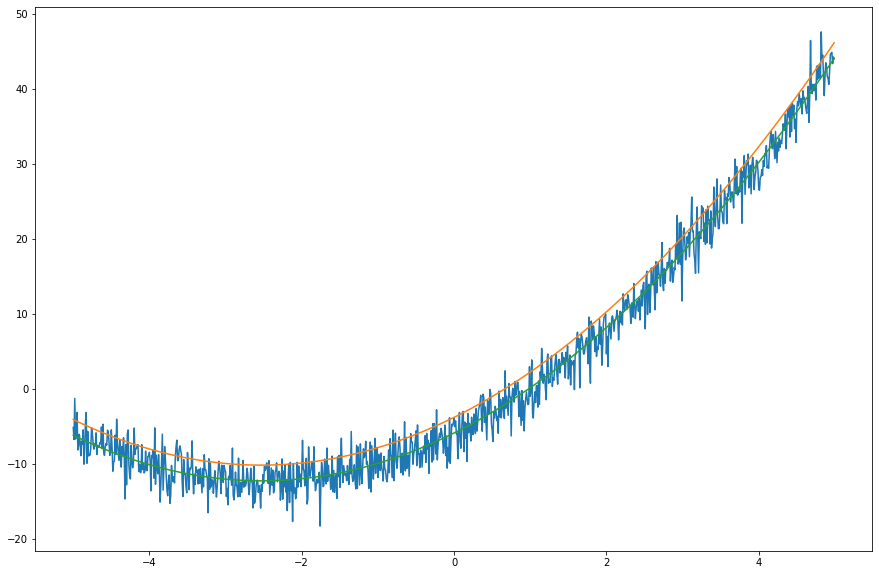

In [93]:
plt.figure(figsize=(15, 10))
plt.plot(x, y)
plt.plot(x, model(x, *results.x))
plt.plot(x, model(x, *popt))

In [104]:
# define likelihood function
def MLERegression(params):
    a, b, c, sd = params # inputs are guesses at our parameters
    yhat = a*x**2 + b*x + c # predictions# next, we flip the Bayesian question
    # compute PDF of observed values normally distributed around mean (yhat)
    # with a standard deviation of sd
    negLL = -np.sum( stats.norm.logpdf(y, loc=yhat, scale=sd) )# return negative LL
    return(negLL)

In [105]:
# let’s start with some random coefficient guesses and optimize
guess = np.array([5,5, 5, 1])

results = minimize(MLERegression, guess, method = 'Nelder-Mead', options={'disp': True})

Optimization terminated successfully.
         Current function value: 2100.297659
         Iterations: 203
         Function evaluations: 349


In [106]:
results.x

array([ 1.01355444,  5.01751183, -6.0462873 ,  1.97653144])

In [79]:
from scipy.optimize import curve_fit

In [82]:
popt, pcov = curve_fit(model, x, y, bounds=((-np.inf, -np.inf, -np.inf, 0), (np.inf, np.inf, np.inf, 0.0000001)))

In [ ]:
curve_fit

In [83]:
popt

array([ 9.96533832e-01,  5.04305297e+00, -5.84837390e+00,  2.29593614e-08])

In [85]:
results.x - popt

array([ 3.89699335e-06, -5.24044962e-06, -3.71637850e-05,  2.09288453e+00])

In [62]:
import sympy
from sympy.stats import Normal, density, P

In [44]:
x, x0 = sympy.symbols('x x0')
sigma = sympy.Symbol('sigma', positive=True)

In [64]:
Z = Normal('N0', x0, sigma)

In [66]:
sympy.log(density(Z)(x))

log(sqrt(2)*exp(-(x - x0)**2/(2*sigma**2))/(2*sqrt(pi)*sigma))

In [227]:
x = np.arange(-5, 5, 0.01)
noise = np.random.randn(len(x))*1

In [228]:
def model(x, a, b, noise):
    #return x*x*np.sin(x+a)*np.cos(x+b)**2 + noise
    return a*x*x*np.exp(-b*x**2) - a*x + noise

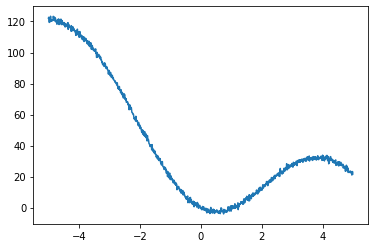

In [229]:
y = model(x, 10, 0.05, noise)
plt.plot(x, y)

In [230]:
def loglikelihood(params):
    a, b, sd = params # inputs are guesses at our parameters
    yhat = model(x, a, b, 0) # predictions# next, we flip the Bayesian question
    # compute PDF of observed values normally distributed around mean (yhat)
    # with a standard deviation of sd
    negLL = -np.sum( stats.norm.logpdf(y, loc=yhat, scale=sd) )# return negative LL
    return(negLL)

In [ ]:
# let’s start with some random coefficient guesses and optimize
guess = np.array([4,0, 5])

results = minimize(MLERegression, guess, method = 'COBYLA', options={'disp': True, 'maxiter': 1000})
results.x

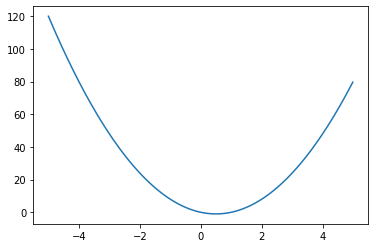

In [244]:
plt.plot(x, model(x, *results.x[:2], 0))

In [263]:
from scipy.stats import *
from scipy import stats

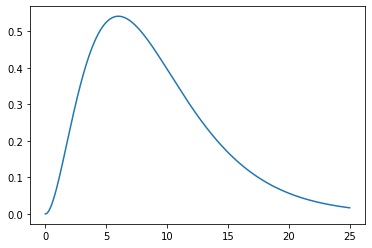

In [394]:
x = np.arange(0,25,0.01)

def poly_exp(x, a, b, x0):
    return (np.exp(- (x/x0)**b) * (x/x0)**a)

plt.plot(x, poly_exp(x, 2, 1, 3))

In [417]:
class poly_exp(stats.rv_continuous):
    "Polynomial exponential distribution"
    def _pdf(self, x, a, b, x0):
        return np.exp(-(x/x0)**b) * (x/x0)**a
        #return stats.expon(x)*stats.expon(x)*stats.powerlaw(x)
    def _logpdf(self, x, a, b, x0):
        return - (x/x0)**b + a * np.log( (x/x0) )
    
func = poly_exp(name='poly_exp', a=0)
y_data = func.rvs(2, 3, 1)

OverflowError: (34, 'Result too large')

TypeError: len() of unsized object

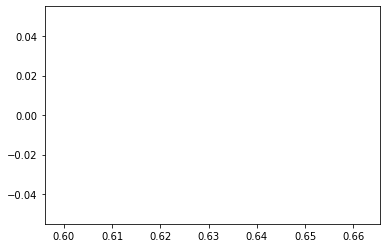

In [418]:
sb.distplot(y_data)

In [419]:
from scipy.optimize import curve_fit

In [351]:
y = func.pdf(x, 4, 3, 3, loc=0, scale=1.5)
popt, pcov = curve_fit(stats.exponnorm.pdf, x, y, p0=np.ones(3))
popt

array([0.5638754 , 4.28695834, 1.33337283])

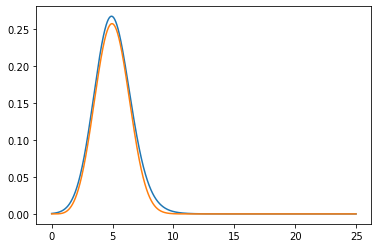

In [352]:
plt.plot(x, stats.exponnorm.pdf(x, *popt))
plt.plot(x, func.pdf(x, 4, 3, 3, loc=0, scale=1.5))

In [411]:
from statsmodels.base.model import GenericLikelihoodModel
#https://austinrochford.com/posts/2015-03-03-mle-python-statsmodels.html

In [358]:
pi = 0.3
lambda_ = 2.
def zip_pmf(x, pi=pi, lambda_=lambda_):
    if pi < 0 or pi > 1 or lambda_ <= 0:
        return np.zeros_like(x)
    else:
        return (x == 0) * pi + (1 - pi) * stats.poisson.pmf(x, lambda_)
    
N = 1000

inflated_zero = stats.bernoulli.rvs(pi, size=N)
x = (1 - inflated_zero) * stats.poisson.rvs(lambda_, size=N)

class ZeroInflatedPoisson(GenericLikelihoodModel):
    def __init__(self, endog, exog=None, **kwds):
        if exog is None:
            exog = np.zeros_like(endog)
            
        super(ZeroInflatedPoisson, self).__init__(endog, exog, **kwds)
    
    def nloglikeobs(self, params):
        pi = params[0]
        lambda_ = params[1]

        return -np.log(zip_pmf(self.endog, pi=pi, lambda_=lambda_))
    
    def fit(self, start_params=None, maxiter=10000, maxfun=5000, **kwds):
        if start_params is None:
            lambda_start = self.endog.mean()
            excess_zeros = (self.endog == 0).mean() - stats.poisson.pmf(0, lambda_start)
            
            start_params = np.array([excess_zeros, lambda_start])
            
        return super(ZeroInflatedPoisson, self).fit(start_params=start_params,
                                                    maxiter=maxiter, maxfun=maxfun, **kwds)

In [359]:
model = ZeroInflatedPoisson(x)
results = model.fit()

Optimization terminated successfully.
         Current function value: 1.582029
         Iterations: 39
         Function evaluations: 74


In [403]:
def poly_exp(x, a, b, x0):
    return np.exp(-(x/x0)**b) * (x/x0)**a

class PolyExp(GenericLikelihoodModel):
    def __init__(self, endog, exog=None, **kwds):
        if exog is None:
            exog = np.zeros_like(endog)
            
        super(PolyExp, self).__init__(endog, exog, **kwds)
    
    def nloglikeobs(self, params):
        a, b = params[0], params[1]
        x0 = params[2]

        return - np.log(poly_exp(self.endog, a=a, b=b, x0=x0))
    
    def fit(self, start_params=None, maxiter=10000, maxfun=5000, **kwds):
        if start_params is None:
            #x0 = self.endog.mean()
            #excess_zeros = (self.endog == 0).mean() - stats.poisson.pmf(0, lambda_start)
            
            start_params = np.array([2, 2, 3])
            
        return super(PolyExp, self).fit(start_params=start_params,
                                                    maxiter=maxiter, maxfun=maxfun, **kwds)

In [404]:
y_data = stats.exponnorm.rvs(2,3,4, size=1000)
model = PolyExp(y_data)
results = model.fit()

Optimization terminated successfully.
         Current function value: 18.610755
         Iterations: 50
         Function evaluations: 249


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\base\model.py:492: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)


In [406]:
results.params

array([2.  , 2.  , 3.15])

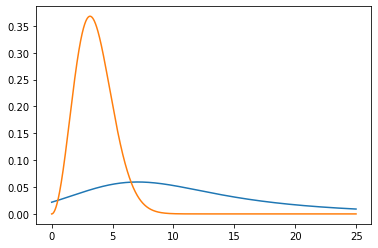

In [410]:
plt.plot(x, stats.exponnorm.pdf(x, 2, 3, 4))
plt.plot(x, func.pdf(x, 2,2,3.15))

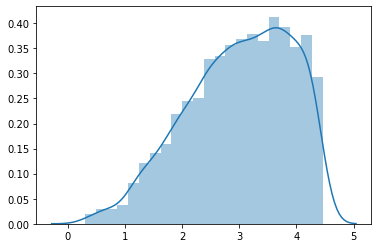

In [374]:
sb.distplot(y_data)

In [378]:
data = func.pdf(x, 2,1,0.5,2, 3)

(0, 0.3)

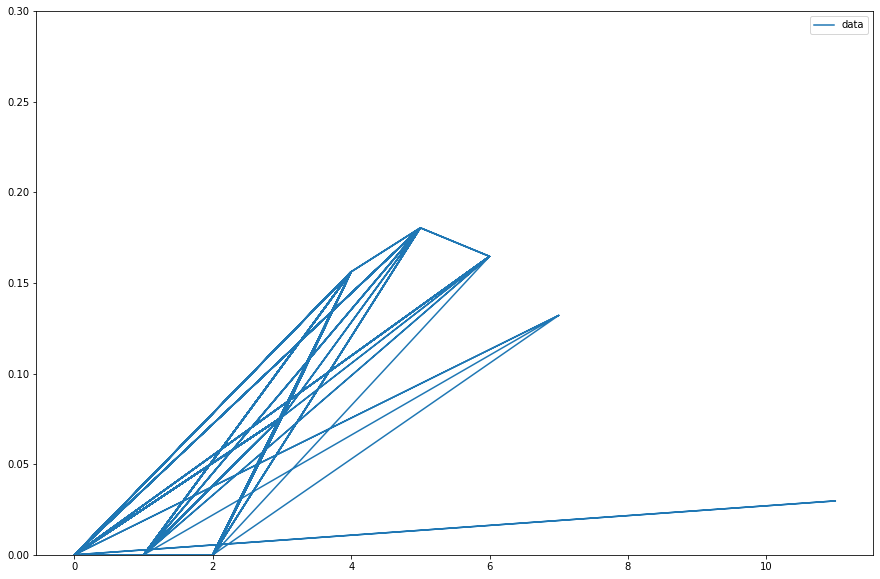

In [379]:
plt.figure(figsize=(15, 10))
#plt.plot(x, func.pdf(x, 2, 1, 2, 1))
#plt.plot(x, stats.exponnorm.pdf(x, 1.96, loc=4.09, scale=1.16))
#plt.plot(x, stats.invweibull.pdf(x, *params), label='inv weibull')
#plt.plot(x, stats.ncx2.pdf(x, *chi_params), label='chi')
#plt.plot(x, stats.skewnorm.pdf(x, *skew_params), label='skew')
#plt.plot(x, stats.nct.pdf(x, *nct_params), label='T')
#plt.plot(x, stats.moyal.pdf(x, *moyal_params), label='moyal')
plt.plot(x, data, label='data')
#sb.distplot(data, bins=20, norm_hist=True, label='data')
plt.legend()
plt.ylim([0,0.3])

In [238]:
params = stats.invweibull.fit(data)
chi_params = stats.ncx2.fit(data)
nct_params = stats.nct.fit(data)
#weibull_params = stats.weibull_max.fit(data)
skew_params = stats.skewnorm.fit(data)
moyal_params = stats.moyal.fit(data)

In [227]:
chi_params

(0.7182167879302549,
 1.3169157037785422,
 -2.4482780746108584e-34,
 0.03675700077462447)

In [217]:
stats.weibull_max?

In [178]:
stats.powernorm?
#stats.norminvgauss?

In [237]:
stats.moyal?

In [159]:
func.fit(data)

(2.4427122770848886,
 0.04056261693916767,
 8.092070378092143e-28,
 0.7232003382330755,
 0.001729965802577705)

In [109]:
from scipy import special

In [219]:
special?